### Examen del primer parcial (evaluación práctica).
#### Simulación de un circuito RL con entrada sinusoidal.

**Objetivo:** Analizar la respuesta de la corriente en un circuito RL en
serie ante una entrada de voltaje sinusoidal. Se observará cómo cambia la
amplitud y la fase de la corriente al variar el valor de la inductancia (L).

---
- Parámetros del circuito y la señal.

In [2]:
# Se importan los módulos necesarios.
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la fuente de voltaje sinusoidal.
V_peak = 10.0 # Amplitud de 10 Volts.
freq = 60 # Frecuencia de 60 Hz.
# Parámetro de la resistencia (fija).
R = 5.0 # 5 Ohms
# Lista de valores de inductancia para simular.
L_values = [5e-3, 15e-3, 30e-3] # 5 mH, 15 mH, 30 mH
# Vector de tiempo para la simulación (simularemos 3 ciclos).
t = np.linspace(0, 3/freq, 1000)
# Frecuencia angular (omega).
w = 2 * np.pi * freq
# Señal de voltaje de entrada (es la misma para todos los casos).
v_t = V_peak * np.sin(w * t)

Matplotlib is building the font cache; this may take a moment.


- Análisis y graficación de resultados.

El siguiente bloque de código itera a través de cada valor de
inductancia definido. Para cada `L`:

1. Calcula la magnitud de la impedancia total del circuito ($Z =
\sqrt{R^2 + (\omega L)^2}$).
2. Calcula la corriente pico usando la Ley de Ohm para AC ($I_{pico} =
V_{pico} / |Z|$).
3. Calcula el ángulo de desfase ($\phi = \arctan(\frac{\omega L}{R})$).
4. Genera y grafica la onda de corriente resultante.

Resultados de la Simulación:
----------------------------------------
Inductancia (mH)     | Corriente Pico (A)   | Desfase(grados)     
----------------------------------------
5.0                  | 1.87                 | 20.66               
15.0                 | 1.32                 | 48.52               
30.0                 | 0.81                 | 66.15               


Text(0.5, 1.0, 'Respuesta de Corriente en Circuito RL para Diferentes Inductancias')

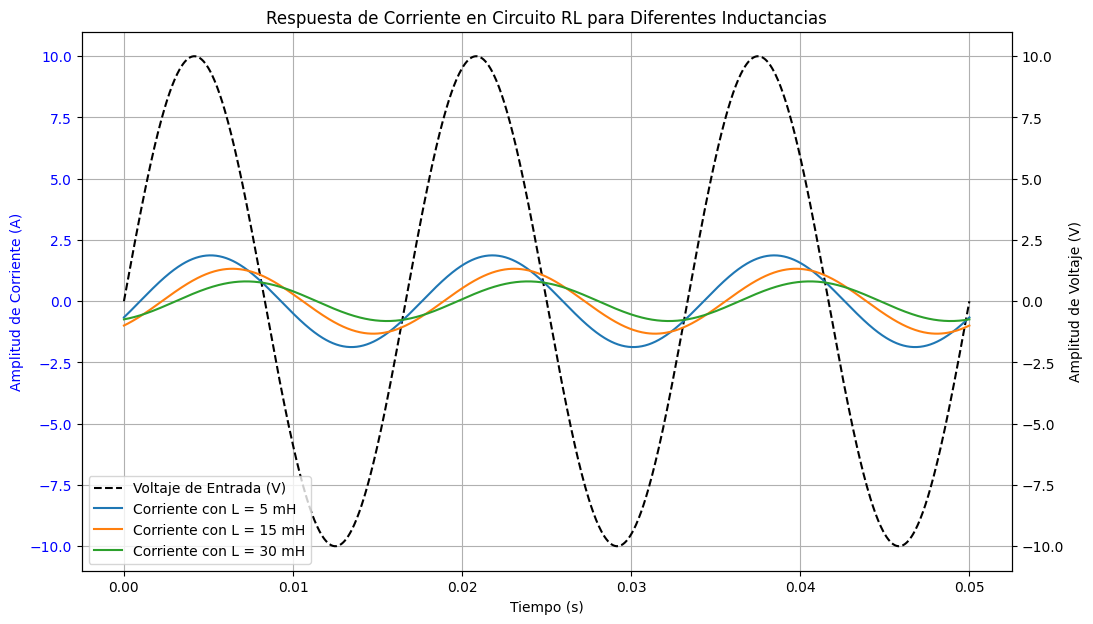

In [12]:
# Se crea la gráfica.
plt.figure(figsize=(12, 7))
ax1 = plt.gca()
# Graficamos el voltaje de entrada como referenciag
ax1.plot(t, v_t, 'k--', label='Voltaje de Entrada (V)')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud de Corriente (A)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
# Bucle para simular y graficar cada inductancia.
print("Resultados de la Simulación:")
print("-" * 40)
print(f"{'Inductancia (mH)':<20} | {'Corriente Pico (A)':<20} | {'Desfase(grados)':<20}")
print("-" * 40)
for L in L_values: 
# Calcular la impedancia (Z)
    Z_mag = np.sqrt(R**2 + (w * L)**2)
# Calcular la corriente pico (I_peak = V_peak / |Z|)
    I_peak = V_peak / Z_mag
# Calcular el ángulo de desfase (phi)
    phi = np.arctan((w * L) / R)
# Calcular la señal de corriente resultante
    i_t = I_peak * np.sin(w * t - phi)
# Imprimir resultados
    print(f"{L*1000:<20.1f} | {I_peak:<20.2f} | {np.degrees(phi):<20.2f}")
# Graficar la corriente en el eje principal
    ax1.plot(t, i_t, label=f'Corriente con L = {L*1000:.0f} mH')
# Configuración final de la Gráfica ---
# Creamos un segundo eje Y para la escala del voltaje
ax2 = ax1.twinx()
ax2.set_ylabel('Amplitud de Voltaje (V)', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.set_ylim(-V_peak*1.1, V_peak*1.1)
ax1.legend(loc='lower left')
plt.title('Respuesta de Corriente en Circuito RL para Diferentes Inductancias')
# En Jupyter Notebook no es estrictamente necesario plt.show() al final de la celda
# La gráfica se renderizará automáticamente

- Conclusiones de la simulación.
Al ejecutar el código, se puede observar en la gráfica que a medida que
**aumenta la inductancia (L)**:

* La **amplitud de la corriente disminuye**. Esto se debe a que una
mayor inductancia genera una mayor reactancia inductiva ($X_L = \omega L$),
lo que aumenta la impedancia total del circuito y limita el paso de la
corriente.
* El **desfase de la corriente aumenta**. La onda de corriente se atrasa
cada vez más con respecto a la onda de voltaje, un efecto característico de
los circuitos inductivos. Esto se ve en la tabla de resultados, donde el
ángulo de desfase es mayor para inductancias más grandes.